<div style="background-color:lightblue; padding:10px; text-align:center;">
    <h1>Introduction</h1>
</div>


The world of jobs related to data and studies in this field is growing a lot. Deciding if you should start a career in this area is not only interesting but also important for your long-term success. 

This project looks into different aspects of data jobs, like working from home, a mix of both, or at the office. The data we're using provides useful insights into how much people get paid. We consider things like work experience, types of jobs, and various roles. The info mostly comes from the United States between 2020 and 2023, giving us a good picture of how things are changing in the data job world. 

We're also trying to guess how much someone might earn based on different factors, making the exploration of data careers even more interesting.

<div style="background-color:lightblue; padding:10px; text-align:center;">
    <h2>Table of Content</h2>
</div>

* [1. Data Collection and Exploration](#data-collection)

* [2. Global Analysis](#global)

* [3. Top 4 Most Common Jobs Analysis](#top4)

* [4. Predicting Salary](#prediction)

* [4. Summary of Key Insights](#summary)






<div style="background-color:lightblue; padding:10px; text-align:center;">
    <a class="anchor" id="data-collection"></a>
    <h2>1. Data Collection and Exploration </h2>
</div>

In [25]:
# Importing essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ipywidgets import interact, widgets
import joblib

In [2]:
# Reading in the source file
df = pd.read_csv('jobs_in_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
# Removing records with na values
df = df[df.notna()]

In [5]:
# Count of unique records in each column
df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [1]:
# Getting the job titles and the number of records for each
pd.concat([df['job_title'].value_counts().to_frame().rename(columns={'job_title': 'Number of Records'}),
            np.round(df['job_title'].value_counts(normalize = True)*100,2).to_frame().rename(columns={'job_title': 'Percentage %'})], 
          axis = 1)

NameError: name 'pd' is not defined

In [8]:
# Getting the job category and the number of records for each
pd.concat([df['job_category'].value_counts().to_frame().rename(columns={'job_category': 'Number of Records'}),
            np.round(df['job_category'].value_counts(normalize = True)*100,2).to_frame().rename(columns={'category': 'Percentage %'})], 
          axis = 1)

,Number of Records,job_category
Data Science and Research,3014,32.22
Data Engineering,2260,24.16
Data Analysis,1457,15.57
Machine Learning and AI,1428,15.26
Leadership and Management,503,5.38
BI and Visualization,313,3.35
Data Architecture and Modeling,259,2.77
Data Management and Strategy,61,0.65
Data Quality and Operations,55,0.59
Cloud and Database,5,0.05


In [9]:
# Getting the distribution of records in time
pd.concat([df['work_year'].value_counts().to_frame().rename(columns={'work_yeark': 'Number of Records'}),
            np.round(df['work_year'].value_counts(normalize = True)*100,2).to_frame().rename(columns={'work_year': 'Percentage %'})], 
          axis = 1)

,work_year,Percentage %
2023,7453,79.67
2022,1634,17.47
2021,197,2.11
2020,71,0.76


In [10]:
# Checking out a sample of the dataframe
df.sample(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
4775,2023,Business Intelligence Engineer,BI and Visualization,USD,202800,202800,United States,Senior,Full-time,In-person,United States,L
5609,2023,Machine Learning Engineer,Machine Learning and AI,USD,200000,200000,United States,Mid-level,Full-time,Remote,United States,M
639,2023,Data Architect,Data Architecture and Modeling,USD,190000,190000,Canada,Senior,Full-time,Remote,Canada,M
3592,2023,Data Engineer,Data Engineering,USD,180514,180514,United Kingdom,Senior,Full-time,Remote,United Kingdom,M
5837,2023,Data Engineer,Data Engineering,USD,85000,85000,United States,Entry-level,Full-time,In-person,United States,M
348,2023,Data Engineer,Data Engineering,USD,150000,150000,United States,Mid-level,Full-time,In-person,United States,M
6291,2023,Data Engineer,Data Engineering,USD,75000,75000,United States,Mid-level,Full-time,Remote,United States,M
2697,2023,Data Engineer,Data Engineering,USD,135000,135000,United States,Senior,Full-time,In-person,United States,M
6357,2023,Data Analyst,Data Analysis,USD,95000,95000,United States,Entry-level,Full-time,Remote,United States,M
5745,2023,Applied Scientist,Data Science and Research,USD,110680,110680,United States,Entry-level,Full-time,In-person,United States,L


In [11]:
# Find out the most datapoints in each country and the percentage it covers so we understand the data context even better
length = df.shape[0]
df_loc = df.groupby(['company_location', 'employee_residence']).agg({'salary_currency': 'count'}).reset_index()
df_loc.rename({'salary_currency': 'Number of DataPoints'}, axis = 1, inplace = True)
df_loc['Percentage %'] = np.round(df_loc['Number of DataPoints'] / length * 100,2)
df_loc = df_loc.sort_values('Percentage %', ascending = False)
df_loc.head()

,company_location,employee_residence,Number of DataPoints,Percentage %
152,United States,United States,8080,86.37
121,United Kingdom,United Kingdom,441,4.71
16,Canada,Canada,220,2.35
107,Spain,Spain,111,1.19
45,Germany,Germany,61,0.65


<div style="background-color:lightblue; padding:10px; text-align:center;">
    <a class="anchor" id="global"></a>
    <h2>2. Global Analysis </h2>
</div>



## Correlation Between Salary, Experience Level, Work Setting and Company Size

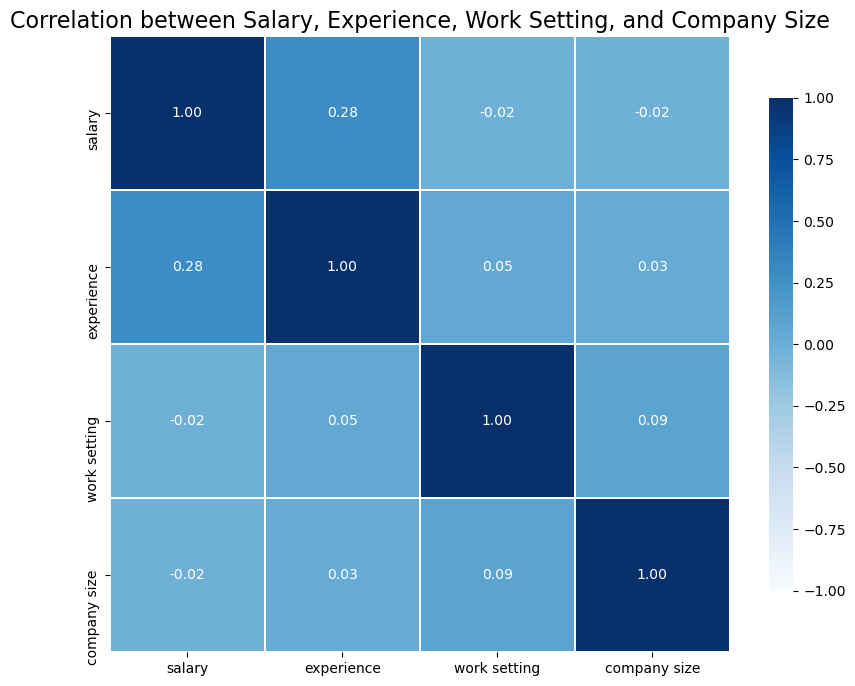

In [12]:
# Encoding non-numerical values into numerical data

label_encoder = LabelEncoder()

df['experience'] = label_encoder.fit_transform(df['experience_level'])
df['work setting'] = label_encoder.fit_transform(df['work_setting'])
df['company size'] = label_encoder.fit_transform(df['company_size'])

# Create the Correlation Matrix

corr = df[['salary', "experience", "work setting", "company size"]].corr()


# Plotting the correlation

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plotting the heatmap
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1, linewidths=.5, fmt=".2f", cbar_kws={"shrink": 0.8})

# Set title and show the plot
plt.title('Correlation between Salary, Experience, Work Setting, and Company Size', fontsize=16)
plt.show()

## Median Salaries Overall and In Entry Level for Each Job Category

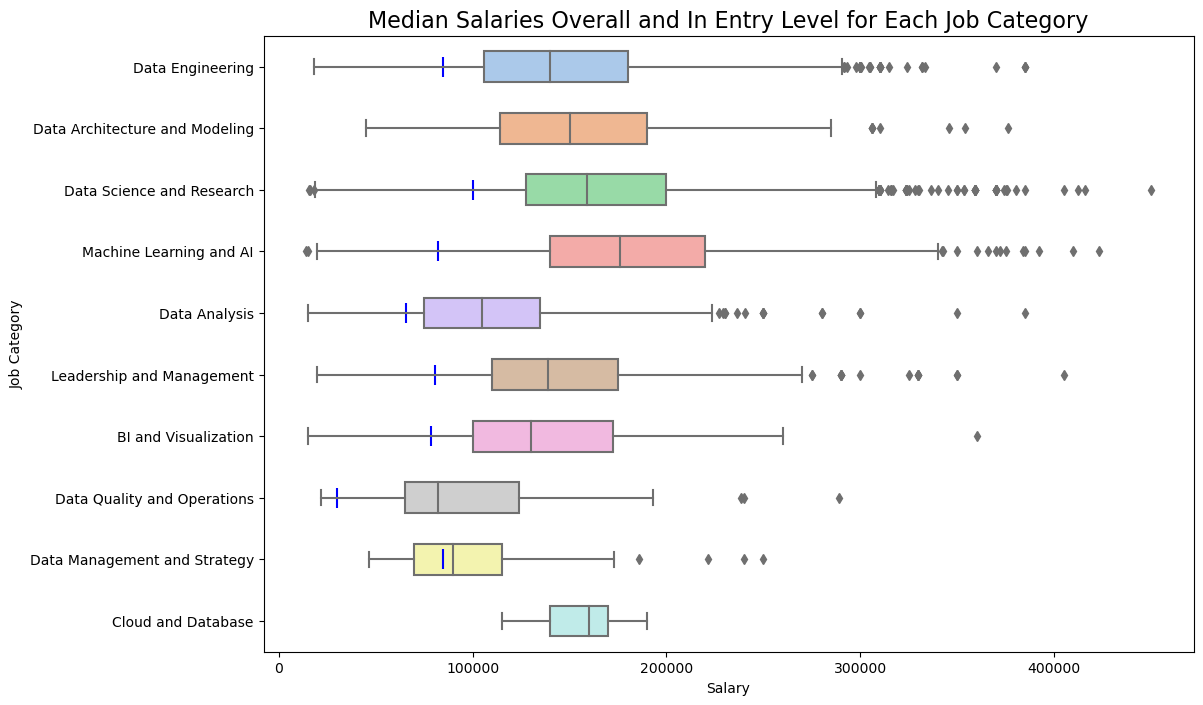

In [13]:
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(x='salary', y='job_category', data=df, palette="pastel", width=0.5)

# Iterate over each unique job category
for job_category in df['job_category'].unique():

    # Calculate median salary for entry-level positions in the current job category
    median_entry_level = df[(df['experience_level'] == 'Entry-level') & (df['job_category'] == job_category)]['salary'].median()
    
    # Add a blue marker for the median salary in entry-level positions
    plt.scatter(x=median_entry_level, y=df['job_category'].unique().tolist().index(job_category), color='blue', marker='|', s=200)

plt.title('Median Salaries Overall and In Entry Level for Each Job Category', fontsize=16)
plt.xlabel('Salary')
plt.ylabel('Job Category')

# Show the plot
plt.show()

## Comparison of Salaries Based On Experience And Work Setting In Each Year <a class="anchor" id="comparison-of-salaries-work-setting"></a>

<Figure size 1500x800 with 0 Axes>

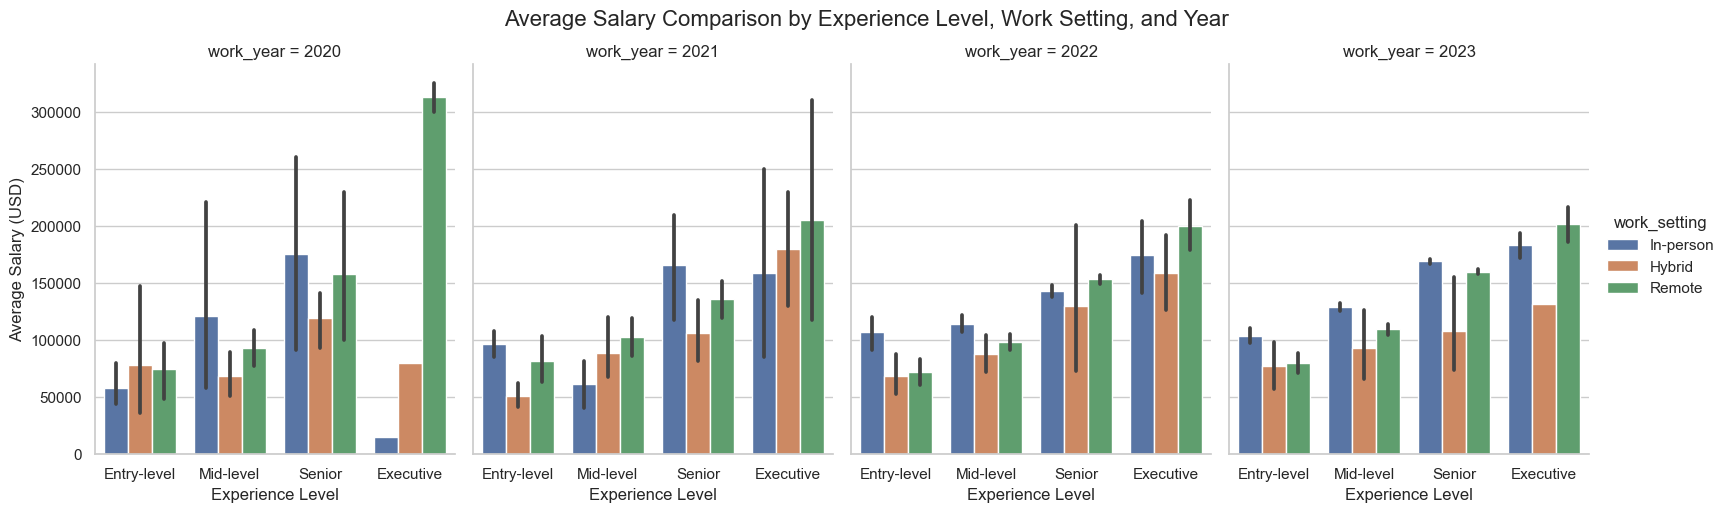

In [14]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Create a categorical plot
g = sns.catplot(
    data=df, 
    x='experience_level', 
    y='salary_in_usd', 
    hue='work_setting', 
    col='work_year',
    kind='bar',
    order=['Entry-level', 'Mid-level', 'Senior', 'Executive'],
    hue_order=['In-person', 'Hybrid', 'Remote'],
    height=5,
    aspect=0.8,
    estimator=np.mean, 
)

# Adjust spacing between subplots and the overall title
g.fig.subplots_adjust(top=0.87)

# Set plot title
g.fig.suptitle('Average Salary Comparison by Experience Level, Work Setting, and Year', fontsize=16)

# Set y-axis label within the context of catplot
g.set_axis_labels('Experience Level', 'Average Salary (USD)')

# Show the plot
plt.show()

<div style="background-color:lightblue; padding:10px; text-align:center;">
    <a class="anchor" id="top4"></a>
    <h2>3. Top 4 Most Common Jobs Analysis </h2>
</div>

In [15]:
# Selecting the top 4 most common jobs only
top4_job_title = df['job_title'].value_counts()[:4].index
df_top = df[df['job_title'].isin(top4_job_title)]

### Median Salary by Year

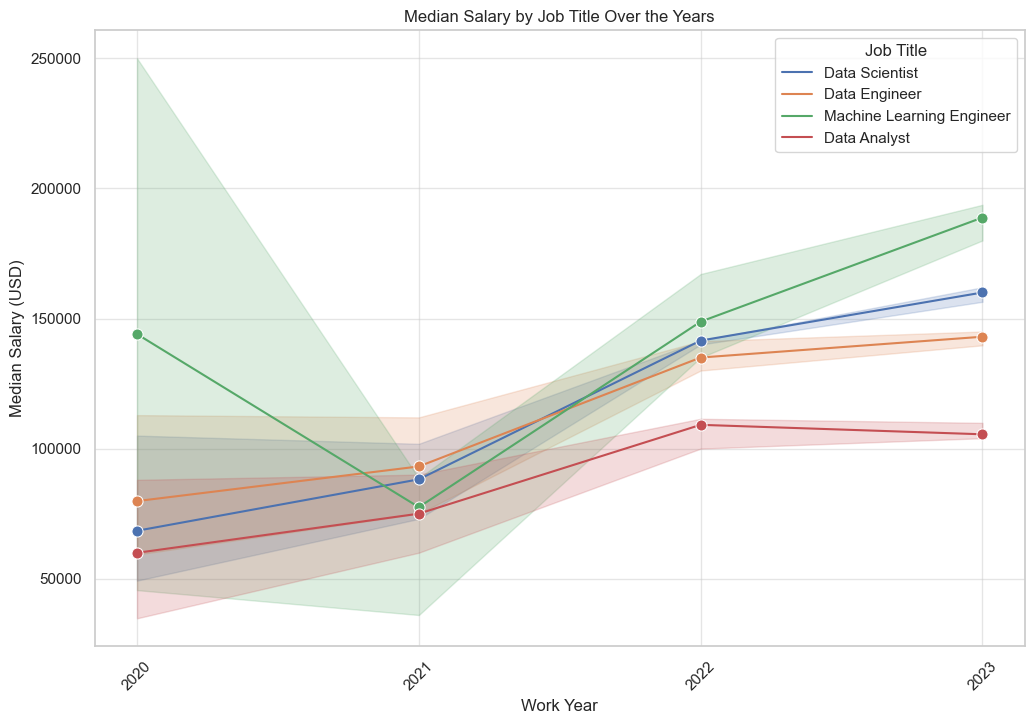

In [16]:
plt.figure(figsize=(12, 8))

# Create a lineplot
sns.lineplot(data=df_top, x='work_year', y='salary_in_usd', hue='job_title', marker='o', markersize=8, estimator = np.median)

# Set plot title, xticks and labels
plt.title('Median Salary by Job Title Over the Years')
plt.xlabel('Work Year')
plt.ylabel('Median Salary (USD)')
plt.xticks(df['work_year'].unique(), rotation=45)

# Add a light grid
plt.grid(True, alpha=0.5)

# Show legend
plt.legend(title='Job Title')

# Show the plot
plt.show()

<div style="background-color:lightblue; padding:10px; text-align:center;">
    <a class="anchor" id="prediction"></a>
    <h2>4. Predicting Salary</h2>
</div>

In [27]:
# Selecting features and target variable
features = ['job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
target = 'salary_category'

df_recent = df[df['work_year'].isin([2022,2023])].copy()

# Calculate the IQR for the specified column
Q1 = df_recent['salary'].quantile(0.25)
Q3 = df_recent['salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_recent = df_recent[(df_recent['salary'] >= lower_bound) & (df_recent['salary'] <= upper_bound)]


# Creating a new column 'salary_category' with salary categories
bin_num = 3
df_recent['salary_category'] = pd.cut(df_recent['salary'], bins=bin_num, labels=False)
bin_edges = pd.cut(df_recent['salary'], bins=bin_num).cat.categories # Save the bin_edges for later use

# Round the start and end values to integers
bin_edges = pd.IntervalIndex.from_tuples([(int(interval.left), int(interval.right)) for interval in bin_edges], closed='right', dtype='interval[int]')

# Encoding categorical variables
df_encoded = pd.get_dummies(df_recent[features])


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_recent[target], test_size=0.2, random_state=42)

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, max_depth= 30, min_samples_leaf= 2, min_samples_split= 10)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Displaying classification report
print('Classification Report:')
print(classification_report(y_test, predictions, zero_division = 1))


Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.42      0.50       481
           1       0.63      0.89      0.74      1035
           2       1.00      0.00      0.00       277

    accuracy                           0.63      1793
   macro avg       0.75      0.44      0.41      1793
weighted avg       0.69      0.63      0.56      1793



In [21]:
bin_edges

IntervalIndex([(14704, 113666], (113666, 212333], (212333, 311000]],
              closed='right',
              dtype='interval[int64]')

In [19]:
# Predict salary based on user inputs
def predict_salary(job_category, experience_level, employment_type, work_setting):
    # Create a user input DataFrame with consistent feature order and names
    user_data = pd.DataFrame({
        'job_category': [job_category],
        'experience_level': [experience_level],
        'employment_type': [employment_type],
        'work_setting': [work_setting]
    })

    # Ensure columns are encoded if needed
    user_data_encoded = pd.get_dummies(user_data)

    # Align columns with the model's training data
    user_data_aligned = user_data_encoded.reindex(columns=df_encoded.columns)

    # Fill missing values with zeros
    user_data_aligned.fillna(0, inplace=True)

    # Make prediction
    try:
        predicted_bin = rf_classifier.predict(user_data_aligned)[0]

        # Map the predicted bin to a salary range
        salary_range_mapping = {}
        for i, edge in enumerate(bin_edges[:-1]):
            salary_range_mapping[i] = f'{edge.left} - {edge.right}'

        predicted_range = salary_range_mapping.get(predicted_bin, 'Unknown')
        print(f'The predicted salary range is: {predicted_range}')
    except ValueError as e:
        print(f'Error: {e}')
        print('Based on this information, I can not help you.')
        # Default behavior: return the most common salary category
        prediction = df_recent[target].mode().iloc[0]

In [20]:
# Create interactive widgets for user input
job_category_widget = widgets.Dropdown(options=df_recent['job_category'].unique(), description='Job Category:')
experience_level_widget = widgets.Dropdown(options=df_recent['experience_level'].unique(), description='Experience Level:')
employment_type_widget = widgets.Dropdown(options=df_recent['employment_type'].unique(), description='Employment Type:')
work_setting_widget = widgets.Dropdown(options=df_recent['work_setting'].unique(), description='Work Setting:')

# Set up the interactive function
interact(
    predict_salary,
    job_category=job_category_widget,
    experience_level=experience_level_widget,
    employment_type=employment_type_widget,
    work_setting=work_setting_widget
);

interactive(children=(Dropdown(description='Job Category:', options=('Data Engineering', 'Data Architecture an…

<div style="background-color:lightblue; padding:10px; text-align:center;">
    <a class="anchor" id="summary"></a>
    <h2>5. Summary of Key Insights</h2>
</div>

##### Dataset Overview:
The dataset predominantly comprises records from the years 2022 and 2023, with a significant portion (86%) representing companies in the United States. The most prevalent job categories are Data Science and Research, Data Engineering, Data Analysis, and Machine Learning and AI.

##### Correlation Analysis:
Exploring the relationship between salary and work experience revealed a weak positive correlation (0.28). Other factors in the dataset demonstrated negligible correlation with each other.

##### Salary Trends:
Machine Learning and AI emerged with the highest median salary, accompanied by Data Science and Research with the most positive outliers. Notably, entry-level positions in Data Science and Research, and particularly in Machine Learning and AI, exhibited promising salary growth over time. The mid-level average salary also showed a positive trajectory, providing motivation for newcomers.

##### Job Category Salary Changes:
Analyzing median salary changes for the four major job categories highlighted dynamic growth for Machine Learning Engineers, while Data Analyst salaries showed a more stagnant trend. The surge in Machine Learning Engineer salaries may be attributed to the rapid advancements in AI and Machine Learning technologies.

##### Model Prediction:
A Random Forest machine learning model was employed for salary prediction. However, the model achieved a moderate accuracy of 0.63, indicating that salary consistency within the dataset is not strong. This observation aligns with earlier findings and reinforces the notion that salary predictions in this context may face challenges due to varying factors.

##### Conclusion:
The analysis provides valuable insights into the dataset, shedding light on salary trends, job categories, and their correlation with work experience. While the Random Forest model yielded moderate accuracy, the findings underscore the nuanced nature of salary predictions and the importance of domain knowledge in interpreting dataset intricacies.

Thank you!